In [ ]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import pandas as pd
dataset=pd.read_csv('/content/Iris[1].csv')

X = dataset.drop(['Id', 'Species'], axis=1)
y = dataset['Species']

X.head()
y.head()

y.value_counts()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.9210526315789473


In [ ]:
X.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
# Load the data set; In this example, the breast cancer dataset is loaded.
bc = datasets.load_iris()
X = bc.data
y = bc.target
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.978


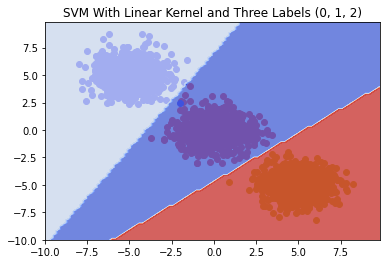

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

N = 1000  # Number of samples

# Create synthetic dataset
X1 = np.random.normal(loc=0, scale=1, size=(N, 2))
Y1 = 0 * np.ones(shape=(1000,))  # LABEL = 0 

X2 = np.random.normal(loc=[-5, 5], scale=1, size=(N, 2))
Y2 = 1 * np.ones(shape=(1000,))  # LABEL = 1

X3 = np.random.normal(loc=[5, -5], scale=1, size=(N, 2))
Y3 = 2 * np.ones(shape=(1000,))  # LABEL = 2

# Create stacked dataset
X = np.vstack((X1, X2, X3))
Y = np.hstack((Y1, Y2, Y3))

# TRAIN SVM LEARNING ALGORITHM
clf = SVC(kernel='linear')
clf = clf.fit(X, Y)

# create decision boundary plot
xx, yy = np.meshgrid(
    np.arange(-10, 10, 0.2),
    np.arange(-10, 10, 0.2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# PLOT EVERYTHING
plt.scatter(X1[:,0], X1[:,1], color='r')
plt.scatter(X2[:,0], X2[:,1], color='b')
plt.scatter(X3[:,0], X3[:,1], color='y')
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("SVM With Linear Kernel and Three Labels (0, 1, 2)")
plt.show()